## Part A: Exploratory Data Analysis (20 marks)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

from IPython.display import display
from collections import Counter

### 1. Load and Explore Dataset

In [2]:
df = pd.read_csv('../data/zomato_df_final_data.csv')
display(df.head())
print('\nDataset dimensions:', df.shape)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b



Dataset dimensions: (10500, 17)


#### 1.1. Data Types

In [3]:
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

#### 1.2. Summary Statistics

In [4]:
df.describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


#### 1.3. Check for Missing Values

In [5]:
na_summary_table = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': df.isna().mean()
})
print(na_summary_table)

               Missing Values  Percentage
address                     0    0.000000
cost                      346    0.032952
cuisine                     0    0.000000
lat                       192    0.018286
link                        0    0.000000
lng                       192    0.018286
phone                       0    0.000000
rating_number            3316    0.315810
rating_text              3316    0.315810
subzone                     0    0.000000
title                       0    0.000000
type                       48    0.004571
votes                    3316    0.315810
groupon                     0    0.000000
color                       0    0.000000
cost_2                    346    0.032952
cuisine_color               0    0.000000


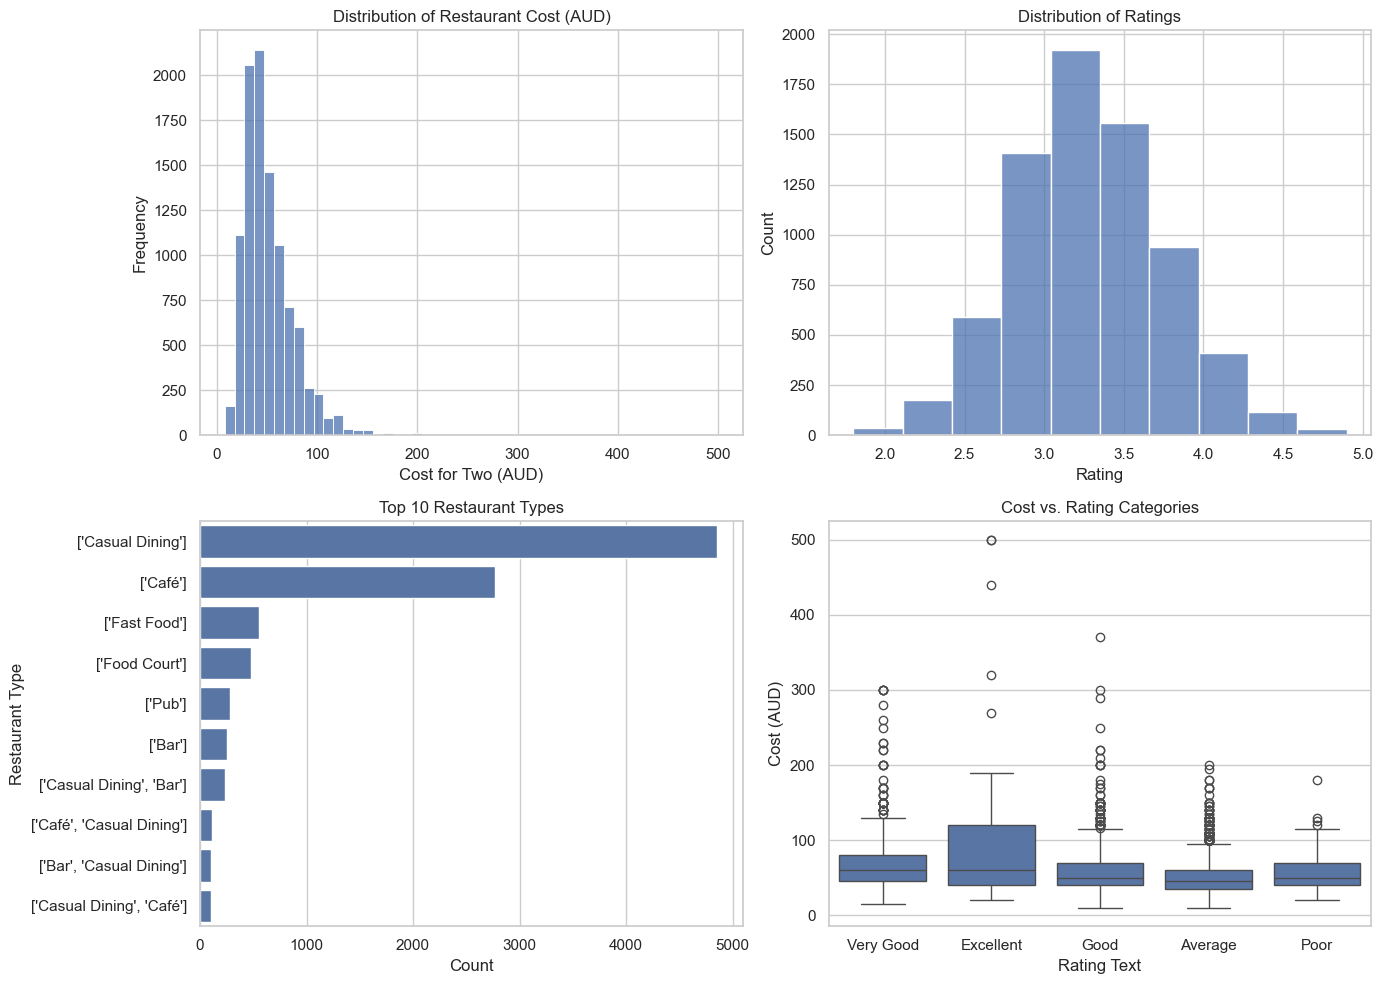

In [6]:
sns.set(style="whitegrid")

# Create subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1. Distribution of Cost
sns.histplot(df['cost'], bins=50, ax=axes[0,0])
axes[0,0].set_title("Distribution of Restaurant Cost (AUD)")
axes[0,0].set_xlabel("Cost for Two (AUD)")
axes[0,0].set_ylabel("Frequency")

# 2. Distribution of Ratings
sns.histplot(df['rating_number'], bins=10, kde=False, ax=axes[0,1])
axes[0,1].set_title("Distribution of Ratings")
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("Count")

# 3. Top 10 Restaurant Types
sns.countplot(y=df['type'], order=df['type'].value_counts().index[:10], ax=axes[1,0])
axes[1,0].set_title("Top 10 Restaurant Types")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Restaurant Type")

# 4. Cost vs. Rating Categories
sns.boxplot(x='rating_text', y='cost', data=df, ax=axes[1,1])
axes[1,1].set_title("Cost vs. Rating Categories")
axes[1,1].set_xlabel("Rating Text")
axes[1,1].set_ylabel("Cost (AUD)")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df['cuisine'] = df['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Flatten the list of cuisines into a single Series
all_cuisines = pd.Series([c.strip() for sublist in df['cuisine'].dropna() for c in sublist])

# Count occurrences
cuisine_counts = all_cuisines.value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

# Display top of table
print(cuisine_counts.head(20))

# Save to CSV for reference
cuisine_counts.to_csv("../data/cuisine_counts.csv", index=False)

In [ ]:
n_cuisines = len(cuisine_counts)
plt.figure(figsize=(10, n_cuisines * 0.3))  # scale height for readability

sns.barplot(
    y=cuisine_counts['Cuisine'],
    x=cuisine_counts['Count']
)

plt.title("Cuisine Counts (All Unique Cuisines)")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

#### 1.4. Geospatial Analysis

In [ ]:
geo = gpd.read_file('../data/sydney.geojson')
display(geo.head())

In [ ]:
print(df['subzone'].head())

In [ ]:
# Count restaurants per suburb
suburb_counts = df.groupby('subzone').size().reset_index(name='restaurant_count')

# Merge with geospatial data
geo = geo.merge(suburb_counts, how='left', left_on='SSC_NAME', right_on='subzone')

# Fill missing with 0 (suburbs with no restaurants in dataset)
geo['restaurant_count'] = geo['restaurant_count'].fillna(0)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))

geo.plot(
    column='restaurant_count',
    cmap='OrRd',    # Orange-Red color scale
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)

ax.set_title("Restaurant Density by Suburb (Sydney)", fontsize=16)
ax.axis("off")
plt.show()

In [ ]:
# Filter restaurants containing "Chinese"
df['is_chinese'] = df['cuisine'].apply(lambda x: 'Chinese' in str(x))

indian_counts = df[df['is_chinese']].groupby('subzone').size().reset_index(name='chinese_count')

# Merge into geo dataframe
geo_indian = geo.merge(indian_counts, how='left', left_on='SSC_NAME', right_on='subzone')
geo_indian['chinese_count'] = geo_indian['chinese_count'].fillna(0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12,10))
geo_indian.plot(
    column='chinese_count',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)
ax.set_title("Chinese Restaurant Density by Suburb", fontsize=16)
ax.axis("off")
plt.show()

In [ ]:
# Start map centered on Sydney
m = folium.Map(location=[-33.8688, 151.2093], zoom_start=11)

# Add choropleth for restaurant density
folium.Choropleth(
    geo_data="../data/sydney.geojson",
    data=suburb_counts,
    columns=["subzone", "restaurant_count"],
    key_on="feature.properties.SSC_NAME",  # replace with correct field
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Restaurant Count"
).add_to(m)

# display(m)
m.save("../visualisations/interactive_suburb_density.html")